## Observations and Insights 

# Pramod Philip

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = mouse_metadata.merge(study_results).sort_values('Tumor Volume (mm3)')

# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
...,...,...,...,...,...,...,...,...
1571,t724,Naftisol,Female,2,25,45,75.113288,2
1179,m269,Stelasyn,Female,22,28,45,75.123690,1
1354,p189,Ketapril,Male,8,28,45,75.294936,4
1152,l725,Naftisol,Female,8,26,45,76.668817,3


In [3]:
# Checking the number of mice.
mouse_count = mouse_df['Mouse ID'].count()
mouse_count

1893

In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupli_mice = mouse_df.duplicated(['Mouse ID'],keep='last')
#dupli_mice = dupli_mice.loc[dupli_mice['']]
#dupli_mice_2 = .duplicated(['Timepoint'],keep = 'last')
dupli_mice

9        True
19       True
8        True
18       True
7        True
        ...  
1571    False
1179    False
1354    False
1152    False
1277    False
Length: 1893, dtype: bool

In [116]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_id = mouse_df.duplicated(['Mouse ID'],keep='last')
dupli_mice_2 = mouse_df[dup_id]
dupli_mice_2


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
...,...,...,...,...,...,...,...,...
929,h246,Ketapril,Male,13,30,40,71.150835,2
1289,o562,Propriva,Female,4,25,40,71.172463,1
1276,o331,Ketapril,Male,24,30,40,71.447743,3
1151,l725,Naftisol,Female,8,26,40,73.693494,3


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df_2 = mouse_df.drop_duplicates(subset=['Mouse ID'],keep='last')
mouse_df_2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
938,h428,Ketapril,Female,1,27,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
752,d133,Zoniferol,Male,5,30,0,45.000000,0
1753,x336,Naftisol,Female,4,29,0,45.000000,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
...,...,...,...,...,...,...,...,...
1571,t724,Naftisol,Female,2,25,45,75.113288,2
1179,m269,Stelasyn,Female,22,28,45,75.123690,1
1354,p189,Ketapril,Male,8,28,45,75.294936,4
1152,l725,Naftisol,Female,8,26,45,76.668817,3


In [15]:
# Checking the number of mice in the clean DataFrame.
mouse_count = mouse_df_2['Mouse ID'].count()
mouse_count

249

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_mean = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
mouse_median = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
mouse_var = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
mouse_sd = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std())
mouse_sem = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())
# Assemble the resulting series into a single summary dataframe.
mouse_stat = pd.concat([mouse_mean,mouse_median,mouse_var,mouse_sd,mouse_sem],axis=1)
mouse_stat = mouse_stat.set_axis(['Tumor Volume Mean','Tumor Volume Median','Tumor Volume Variance',
                                 'Tumor Volume Standard Deviation','Tumor Volume Standard Error of Mean'], axis=1)
mouse_stat

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Mean
Drug Regimen,,,,,
Capomulin,46.119199,45.893720,1.019059,1.009485,0.201897
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.525392,60.165180,61.216264,7.824082,1.564816
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,45.678645,45.521875,0.587093,0.766220,0.153244
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_stat
# Using the aggregation method, produce the same summary statistics in a single line
agg_mouse = mouse_df_2.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean',
                                                                           'median',
                                                                           'var',
                                                                           'std',
                                                                           'sem']})
agg_mouse

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             46.119199  45.893720    1.019059   1.009485  0.201897
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.525392  60.165180   61.216264   7.824082  1.564816
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane              45.678645  45.521875    0.587093   0.766220  0.153244
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

## Bar and Pie Charts

Zoniferol    25
Infubinol    25
Capomulin    25
Ramicane     25
Placebo      25
Naftisol     25
Propriva     25
Ketapril     25
Ceftamin     25
Stelasyn     24
Name: Drug Regimen, dtype: int64

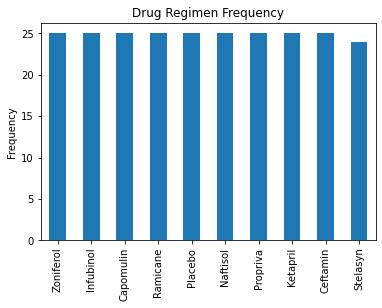

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = mouse_df_2['Drug Regimen'].value_counts()
drug_regimen = drug_count.plot(kind='bar',title='Drug Regimen Frequency')
drug_regimen.set_ylabel('Frequency')

drug_count

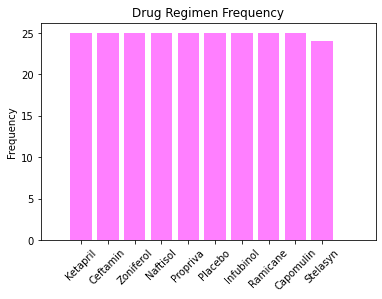

Zoniferol    25
Infubinol    25
Capomulin    25
Ramicane     25
Placebo      25
Naftisol     25
Propriva     25
Ketapril     25
Ceftamin     25
Stelasyn     24
Name: Drug Regimen, dtype: int64

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_names = mouse_df_2['Drug Regimen'].unique()
drug_count = mouse_df_2['Drug Regimen'].value_counts()
x_axis = np.arange(len(drug_count))
plt.bar(x_axis,drug_count, color = 'fuchsia', alpha=0.5, align='center')

ticks = [v for v in x_axis]
plt.xticks(ticks, drug_names,rotation = 45)
plt.ylabel('Frequency')
plt.title('Drug Regimen Frequency')
plt.xlim(-1.5,len(x_axis)+1)
plt.show()

drug_count

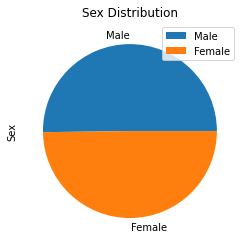

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gen = mouse_df_2['Sex'].value_counts()
mouse_gen_pie = mouse_gen.plot(kind='pie',title='Sex Distribution',legend=True)

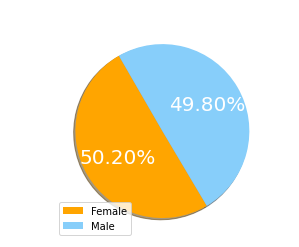

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female','Male']
sizes = mouse_gen
colors = ['orange','lightskyblue']

plt.pie(sizes,labels=labels,colors=colors,shadow=True,startangle=120,
        autopct="%1.2f%%",textprops={'color':"w", 'size':20})
plt.title('Sex Distribution',fontdict={'color':'white'})
plt.legend(labels,loc=3)
plt.show()

## Quartiles, Outliers and Boxplots

In [76]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulin = mouse_df.loc[mouse_df['Drug Regimen'] == 'Capomulin']
ramicane = mouse_df.loc[mouse_df['Drug Regimen'] == 'Ramicane']
infubinol = mouse_df.loc[mouse_df['Drug Regimen'] == 'Infubinol']
ceftamin = mouse_df.loc[mouse_df['Drug Regimen'] == 'Ceftamin']
four_regi = pd.concat([capomulin,ramicane,infubinol,ceftamin],axis=0)
four_regi = four_regi.set_index('Mouse ID')
new_four_regi = four_regi.groupby(['Drug Regimen','Mouse ID']).agg({'Timepoint':['max']})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_regi = pd.merge(four_regi,new_four_regi,on='Mouse ID')
new_regi.rename(columns={('Timepoint','max'):'Timepoint Max'}, inplace=True)
new_regi = new_regi.loc[new_regi['Timepoint']==new_regi[('Timepoint Max')]]

new_regi

/Users/pramodphilip/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint Max
Mouse ID,,,,,,,,
s185,Capomulin,Female,3,17,45,23.343598,1,45
x401,Capomulin,Female,16,15,45,28.484033,0,45
m601,Capomulin,Male,22,17,45,28.430964,1,45
f966,Capomulin,Male,16,17,20,30.485985,0,20
u364,Capomulin,Male,18,17,45,31.023923,3,45
...,...,...,...,...,...,...,...,...
b447,Ceftamin,Male,2,30,0,45.000000,0,0
o287,Ceftamin,Male,2,28,45,59.741901,4,45
q483,Ceftamin,Male,6,26,40,64.192341,1,40


In [67]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
upper_regi = new_regi['Tumor Volume (mm3)'].quantile(0.75)
lower_regi = new_regi['Tumor Volume (mm3)'].quantile(0.25)
iqr_regi = upper_regi - lower_regi

# Determine outliers using upper and lower bounds
up_bound = upper_regi + (1.5*iqr_regi)
low_bound = lower_regi - (1.5*iqr_regi)

#No values above or below bounds
new_regi[(new_regi['Tumor Volume (mm3)']<low_bound)|(new_regi['Tumor Volume (mm3)']>up_bound)]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint Max
Mouse ID,,,,,,,,


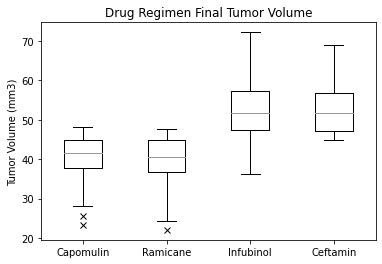

In [87]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin = mouse_df.loc[mouse_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = mouse_df.loc[mouse_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = mouse_df.loc[mouse_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = mouse_df.loc[mouse_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
drug_regis = ['Capomulin','Ramicane','Infubinol','Ceftamin']
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=drug_regis,flierprops={'marker':'x'})
plt.title('Drug Regimen Final Tumor Volume')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

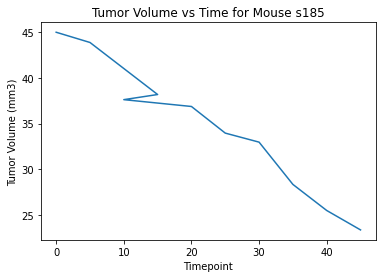

In [90]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse = mouse_df.loc[mouse_df['Mouse ID'] == 's185']
plt.plot(capo_mouse['Timepoint'],capo_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Time for Mouse s185')
plt.show()

Text(20, 36, 'y=0.954x +21.552')

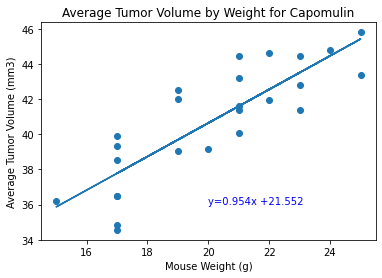

In [111]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_mice = mouse_df.loc[mouse_df['Drug Regimen'] == 'Capomulin']
avg_tum = capo_mice.groupby(['Mouse ID']).mean()
avg_tum.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'}, inplace=True)

plt.scatter(avg_tum['Weight (g)'],avg_tum['Average Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight for Capomulin')

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(avg_tum['Weight (g)'],avg_tum['Average Tumor Volume (mm3)'])
tum_regress_line = avg_tum['Weight (g)']*slope + intercept

equation = 'y=' + str(round(slope,3))+"x +" + str(round(intercept,3))
plt.plot(avg_tum['Weight (g)'],tum_regress_line)
plt.annotate(equation,(20,36),fontsize=10,color='blue')

## Correlation and Regression